### Importing Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from collections import Counter

### Importing the Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 60000
Test samples: 10000
Image shape: (28, 28)

Class distribution in training set:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


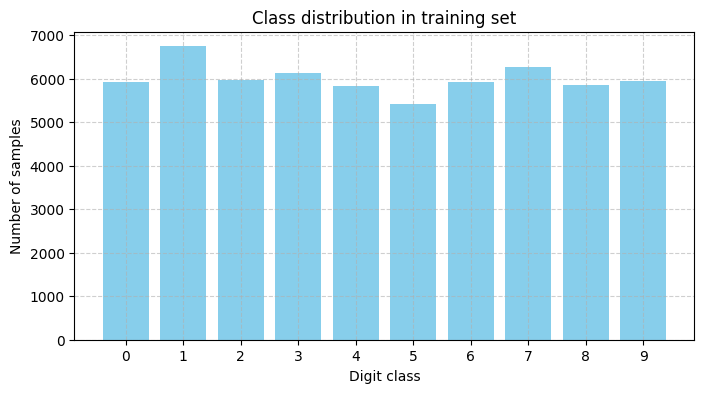

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Print dataset info
print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]}")

# Class distribution
train_counts = Counter(y_train)
print("\nClass distribution in training set:")
for label in sorted(train_counts):
    print(f"Digit {label}: {train_counts[label]} samples")

# Optional: visualize distribution as bar plot
plt.figure(figsize=(8, 4))
plt.bar(train_counts.keys(), train_counts.values(), color='skyblue')
plt.title('Class distribution in training set')
plt.xlabel('Digit class')
plt.ylabel('Number of samples')
plt.xticks(range(10))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

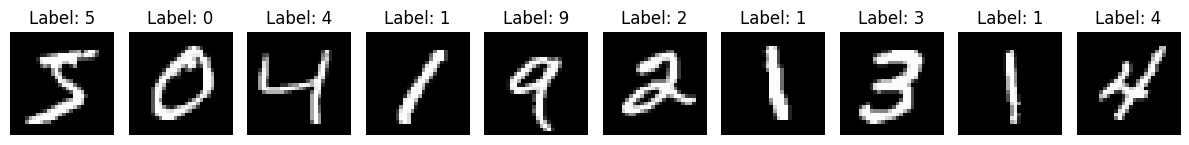

In [3]:

x_train = x_train.reshape(-1, 28, 28)

# Number of samples to display
n_samples = 10

# Plot the first n_samples images with their labels
plt.figure(figsize=(12, 2))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Data Normalization

In [4]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test_flat = x_test.reshape(10000, 784).astype('float32') / 255.0

### Theory Behind Implemented Backpropagation

### 1. Calculating the Derivative of Cross entropy Loss with respect to second Weight Matrix:

- We want to calculate this :
$$
\frac{\partial J(\theta)}{\partial W_2}
$$
- In order to do that we have to split it like this and calculate each term by itself:
$$
\frac{\partial J(\theta)}{\partial W_2} = \frac{\partial J(\theta)}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial W_2}
$$

- Calculating the first half:

$$
\frac{\partial J(\theta)}{\partial Z_{2,j}} = \sum_{k} \left( \frac{\partial J}{\partial \hat{y}_k} \cdot \frac{\partial \hat{y}_k}{\partial Z_{2,j}} \right)
$$

- We can further split the first half into two seperate calculations:
$$
\frac{\partial J}{\partial \hat{y}_k} \quad \text{and} \quad \frac{\partial \hat{y}_k}{\partial Z_{2,j}}
$$

- Starting by the first one:

- This is the derivative of the Cross-Entropy Loss function with respect to the output of the activation of output layer, which is calculated by this formula:

$$
J(\theta) = -\frac{1}{m} \sum_{k} \sum_{j} y_j^{(i)} \log \hat{y}_j^{(i)}
$$

- For one sample, the formula is :
$$
J^{(i)}(\theta) = -\sum_{k} y_j^{(i)} \log \hat{y}_j^{(i)}
$$

- derivating w.r.t y_hat gives us:

$$
\frac{\partial J^{(i)}(\theta)}{\partial \hat{y}_j^{(i)}} = -\frac{y_j^{(i)}}{\hat{y}_j^{(i)}}
$$

- here only yj is kept because we onlt have one index where y true is equal to 1.

- Next, we calculate the second part :

$$
\frac{\partial \hat{y}_j^{(i)}}{\partial Z_{2,j}^{(i)}}
$$

- We start by defining the mathematical formulation for the second activation function, which is Softmax:

$$
\frac{e^{Z_{2,k}}}{\sum_{i} e^{Z_{2,i}}}
$$

- We want to calculate this :
$$
\frac{\partial \hat{y}_k^{(i)}}{\partial Z_{2,j}^{(i)}} = \frac{\partial}{\partial Z_{2,j}} \left( \frac{e^{Z_{2,k}}}{\sum_{i} e^{Z_{2,i}}} \right)
$$

Which can have two different values, depending on the index k.

- If k = j:

$$
\frac{\partial \hat{y}_j^{(i)}}{\partial Z_{2,j}^{(i)}} =
\frac{e^{Z_{2,j}} \sum_{i} e^{Z_{2,i}} - e^{Z_{2,j}} e^{Z_{2,j}}}{\left( \sum_{i} e^{Z_{2,i}} \right)^2}
= \left( \frac{e^{Z_{2,j}}}{\sum_{i} e^{Z_{2,i}}} \right) \left( 1 - \frac{e^{Z_{2,j}}}{\sum_{i} e^{Z_{2,i}}} \right)
= \hat{y}_j^{(i)} \left( 1 - \hat{y}_j^{(i)} \right)
$$

- If k != j:

$$
\frac{\partial \hat{y}_k^{(i)}}{\partial Z_{2,j}^{(i)}} =
\frac{0 \cdot \sum_{i} e^{Z_{2,i}} - e^{Z_{2,j}} e^{Z_{2,k}}}{\left( \sum_{i} e^{Z_{2,i}} \right)^2}
= -\left( \frac{e^{Z_{2,j}}}{\sum_{i} e^{Z_{2,i}}} \right) \left( \frac{e^{Z_{2,k}}}{\sum_{i} e^{Z_{2,i}}} \right)
= -\hat{y}_j^{(i)} \hat{y}_k^{(i)}
$$

- Now we can calculate our formula :

$$
\frac{\partial J(\theta)}{\partial Z_{2,j}} = \sum_{k} \left( \frac{\partial J}{\partial \hat{y}_k} \cdot \frac{\partial \hat{y}_k}{\partial Z_{2,j}} \right)
$$

- Before replacing, we split it into two terms; the j-th term and the sum of other terms :

$$
\frac{\partial J(\theta)}{\partial Z_{2,j}} = \frac{\partial J}{\partial \hat{y}_j} \cdot \frac{\partial \hat{y}_j}{\partial Z_{2,j}}
+ \sum_{k \neq j} \left( \frac{\partial J}{\partial \hat{y}_k} \cdot \frac{\partial \hat{y}_k}{\partial Z_{2,j}} \right)
$$

- Now we replace with the calculated terms :

$$
\frac{\partial J(\theta)}{\partial Z_{2,j}} =
- \left( \frac{y_j}{\hat{y}_j} \right) \hat{y}_j (1 - \hat{y}_j)
+ \sum_{k \neq j} \left( - \left( \frac{y_k}{\hat{y}_k} \right) \left( - \hat{y}_k \hat{y}_j \right) \right)
$$

$$
= y_j (\hat{y}_j - 1) + \sum_{k \neq j} (y_k \hat{y}_j)
$$

$$
= y_j (\hat{y}_j - 1) + \hat{y}_j \sum_{k \neq j} y_k
$$

$$
= y_j (\hat{y}_j - 1) + \hat{y}_j (1 - y_j) \quad \text{(since } \sum_{k} y_k = 1 \text{)}
$$

$$
= y_j \hat{y}_j - y_j + \hat{y}_j - \hat{y}_j y_j
$$

$$
= \hat{y}_j - y_j
$$

- We can generalize :

$$
\frac{\partial J(\theta)}{\partial Z_2} = \hat{Y} - Y
$$


- Now for the second half which is simpler, we recall the pre-activation step in forward propagation :

$$
Z_2 = W_2 \tilde{A}_1
$$

- With a simple derivation we find :

$$
\frac{\partial Z_2}{\partial W_2} = \tilde{A}_1^T
$$

- This, The final Formula is :
$$
\frac{\partial J(\theta)}{\partial W_2} = ( \hat{y}_j - y_j ) \cdot  \tilde{A}_1^T
$$


### 2. Calculating the Derivative of Cross entropy Loss with respect to first Weight Matrix:

- We want to calculate this :
$$
\frac{\partial J(\theta)}{\partial W_1}
$$

- So we need to split it like this and calculate each term :
$$
\frac{\partial J(\theta)}{\partial W_1} =
\frac{\partial J}{\partial Z_2} \cdot
\frac{\partial Z_2}{\partial A_1} \cdot
\frac{\partial A_1}{\partial Z_1} \cdot
\frac{\partial Z_1}{\partial W_1}
$$

- We have already Calculated the First one above :
$$
\frac{\partial J}{\partial Z_2} = \hat{Y} - Y
$$

- For the second term we recall the pre-activation of output layer :

$$
Z_2 = W_2 \tilde{A}_1
$$

- We can write it in the following format:
$$
Z_2 = W_2' A_1 + b_2 \mathbf{1}
$$

**where**  
- \( W_2' \) is the second weight matrix without bias,  
- \( A_1 \) is the activated hidden layer, and  
- \( b_2 \) is the bias vector.

- Derivation w.r.t A1 gives :
$$
\frac{\partial Z_2}{\partial A_1} = W_2'^T
$$

- For the third term, we need to find activation derivative in which we used the tanh function :

$$
A_1 = \tanh(Z_1)
$$

- We derivate :

$$
\frac{\partial A_1}{\partial Z_1} = 1 - \tanh^2(Z_1) = 1 - A_1^2
$$

- For the final term, we recall the first pre-activation :

$$
Z_1 = W_1 \tilde{A}_0
$$

- We find :

$$
\frac{\partial Z_1}{\partial W_1} = \tilde{A}_0^T
$$

- Combining all terms we find :


$$
\frac{\partial J(\theta)}{\partial W_1} = (\hat{Y} - Y) \cdot  (W_2'^T) \cdot  (1 - A_1^2) \cdot  (\tilde{A}_0^T)
$$

### MLP model definition

In [5]:
class MLP:
    def __init__(self, X, y, hidden=12):
        self.X = X.T
        self.y = self.one_hot_encode(y)
        self.init_params(self.X.shape[0], hidden, self.y.shape[0])

    def init_params(self, nx, nh, ny):
        self.theta1 = np.random.randn(nh, nx + 1) * np.sqrt(2 / (nx + nh))
        self.theta2 = np.random.randn(ny, nh + 1) * np.sqrt(2 / (nh + ny))

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    def forward(self, batch):
        A1 = np.vstack([np.ones((1, batch.shape[1])), batch])
        Z2 = np.dot(self.theta1, A1)
        A2 = np.tanh(Z2)
        A2 = np.vstack([np.ones((1, A2.shape[1])), A2])
        Z3 = np.dot(self.theta2, A2)
        A3 = self.softmax(Z3)
        return A1, Z2, A2, Z3, A3

    def backward(self, X, y):
        A1, Z2, A2, Z3, y_hat = self.forward(X)

        dZ3 = y_hat - y
        dJ_dW2 = np.dot(dZ3, A2.T)

        dZ2 = np.dot(self.theta2[:, 1:].T, dZ3) * (1 - np.square(A2[1:, :]))
        dJ_dW1 = np.dot(dZ2, A1.T)

        return dJ_dW1, dJ_dW2

    def sgd(self, batch_size, eta):
        m = self.X.shape[1]
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch = self.X[:, indices]
        y_batch = self.y[:, indices]

        grads = self.backward(X_batch, y_batch)

        self.theta1 -= (eta / batch_size) * grads[0]
        self.theta2 -= (eta / batch_size) * grads[1]

        A1, Z2, A2, Z3, y_hat = self.forward(X_batch)
        loss = self.cross_entropy_error(y_hat, y_batch)
        acc = self.accuracy_score(y_hat, y_batch)

        return loss, acc

    def learn(self, iter, eta=0.01, batch_size=32, print_every=100):
        losses = []
        accuracies = []
        m = self.X.shape[1]
        if m < batch_size:
            batch_size = m

        for iteration in range(iter):
            loss, acc = self.sgd(batch_size=batch_size, eta=eta)
            if iteration % print_every == 0:
                print(f"Iteration {iteration}/{iter}, Loss : {loss}, Accuracy : {acc}")
            losses.append(loss)
            accuracies.append(acc)

        return losses, accuracies

    def one_hot_encode(self, y):
        num_classes = np.max(y) + 1
        one_hot = np.zeros((num_classes, y.shape[0]))
        one_hot[y, np.arange(y.shape[0])] = 1
        return one_hot

    def cross_entropy_error(self, y_hat, y):
        if y.ndim == 1 or y.shape[0] != self.y.shape[0]:
            y = self.one_hot_encode(y)
        m = y.shape[1]
        cost = -np.sum(y * np.log(y_hat + 1e-8)) / m
        return cost

    def accuracy_score(self, y_hat, y):
        predicted_classes = np.argmax(y_hat, axis=0)
        true_classes = np.argmax(y, axis=0)
        correct_predictions = np.sum(predicted_classes == true_classes)
        accuracy = correct_predictions / y.shape[1]
        return accuracy

    def predict(self, x_to_pred):
        A1, Z2, A2, Z3, A3 = self.forward(x_to_pred.T)
        return A3

### Model instance

In [6]:
mlp = MLP(x_train, y_train, 64) # 64 hidden layers

### Training with params : 50 iterations, 0.1 learning rate and batch size of 128

In [7]:
losses, accuracies = mlp.learn(iter=50, eta=0.1, batch_size=128, print_every=5)

Iteration 0/50, Loss : 2.120376433096708, Accuracy : 0.234375
Iteration 5/50, Loss : 1.6585781210483033, Accuracy : 0.5859375
Iteration 10/50, Loss : 1.3504629724481623, Accuracy : 0.7109375
Iteration 15/50, Loss : 1.115155673620187, Accuracy : 0.734375
Iteration 20/50, Loss : 1.0989461870228734, Accuracy : 0.734375
Iteration 25/50, Loss : 0.9305205420141665, Accuracy : 0.765625
Iteration 30/50, Loss : 0.7719636661840286, Accuracy : 0.8671875
Iteration 35/50, Loss : 0.7462299763472573, Accuracy : 0.9296875
Iteration 40/50, Loss : 0.6939558300724596, Accuracy : 0.84375
Iteration 45/50, Loss : 0.738049612821759, Accuracy : 0.8203125


### Plotting the loss and accuracy

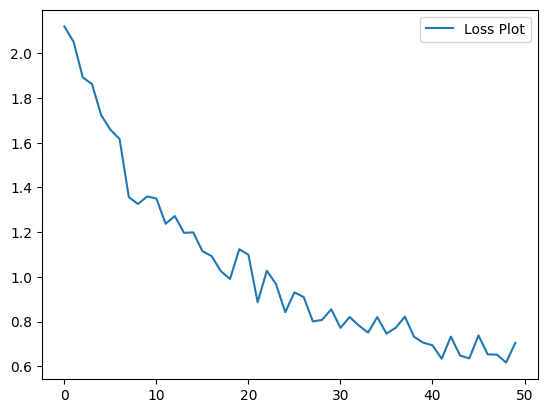

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses, label="Loss Plot")
plt.legend()
plt.show()

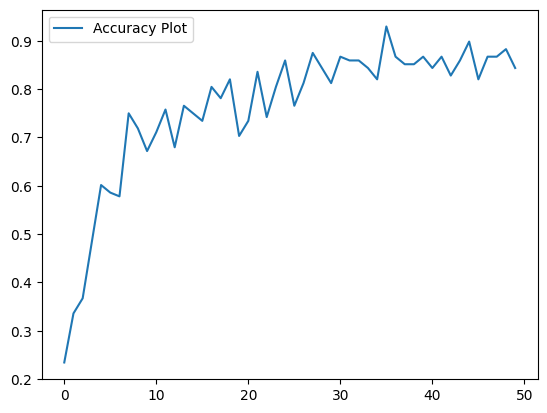

In [9]:
plt.plot(accuracies, label="Accuracy Plot")
plt.legend()
plt.show()

### Prediction

In [10]:
y_hat = mlp.predict(x_test_flat)
y_pred = np.argmax(y_hat, axis=0)


In [11]:
y_test_encoded = mlp.one_hot_encode(y_test)


### Accuracy of prediction

In [12]:
mlp.accuracy_score(y_hat, y_test_encoded)

np.float64(0.8515)


Total misclassified samples: 1485


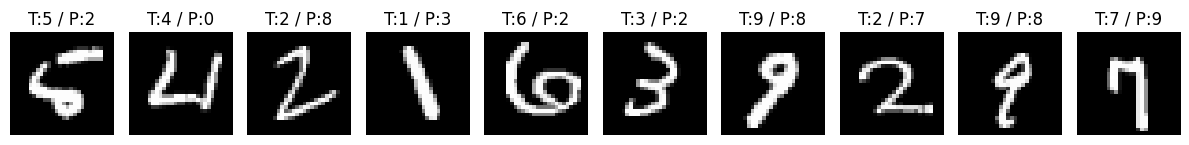

In [13]:

# Find misclassified indices
misclassified = np.where(y_pred != y_test)[0]
print(f"\nTotal misclassified samples: {len(misclassified)}")

# Print the details of the first few misclassified instances
n = 10  # Number of misclassified samples to show
plt.figure(figsize=(12, 4))
for j, i in enumerate(misclassified[:n]):
    plt.subplot(1, n, j + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"T:{y_test[i]} / P:{y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()